In [26]:
import numpy as np  # Import the NumPy library and alias it as 'np' for convenience.
import pandas as pd  # Import the pandas library and alias it as 'pd' for convenience.


In [29]:
# Define the data as a list of dictionaries
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no


In [33]:
# Save the DataFrame to a CSV file
output_filename = "student_purchase_behavior.csv"
df.to_csv(output_filename, index=False)  # Set index=False to exclude the index column

In [34]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'age' column
df['age'] = label_encoder.fit_transform(df['age'])

# Print the DataFrame with the 'age' column encoded
print(df)


    age  income student credit_rating buys_computer
0     1    high      no          fair            no
1     1    high      no     excellent            no
2     0    high      no          fair           yes
3     2  medium      no          fair           yes
4     2     low     yes          fair           yes
5     2     low     yes     excellent            no
6     0     low     yes     excellent           yes
7     1  medium      no          fair            no
8     1     low     yes          fair           yes
9     2  medium     yes          fair           yes
10    1  medium     yes     excellent           yes
11    0  medium      no     excellent           yes
12    0    high     yes          fair           yes
13    2  medium      no     excellent            no


In [5]:
# Display the first few rows of the DataFrame
print(df.head())

,age,income,student,credit_rating,buys_computer
0,1,high,no,fair,no
1,1,high,no,excellent,no
2,0,high,no,fair,yes
3,2,medium,no,fair,yes
4,2,low,yes,fair,yes


In [36]:
'''A1. For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.
'''
import math

# Calculate entropy for 'buys_computer'
def entropy(data):
    entropy = 0
    total_count = len(data)
    unique_classes = data['buys_computer'].unique()

    for c in unique_classes:
        p = (data['buys_computer'] == c).sum() / total_count
        entropy -= p * math.log2(p)

    return entropy

entropy_root = entropy(df)

# Calculate Information Gain for each feature
def information_gain(data, feature):
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    return entropy_root - weighted_entropy

# Calculate Information Gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {feature: information_gain(df, feature) for feature in features}

# Find the feature with the highest Information Gain
root_feature = max(information_gains, key=information_gains.get)

print("Information Gains:")
print(information_gains)
print("The first feature for the decision tree is:", root_feature)


Information Gains:
{'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rating': 0.04812703040826949}
The first feature for the decision tree is: age


In [37]:
'''A2. Create a Decision Tree for the above data. Get the
 depth of the constructed tree.'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X_data = df.drop('buys_computer', axis=1)
y_data = df['buys_computer']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X_data)

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the training set accuracy
training_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 4


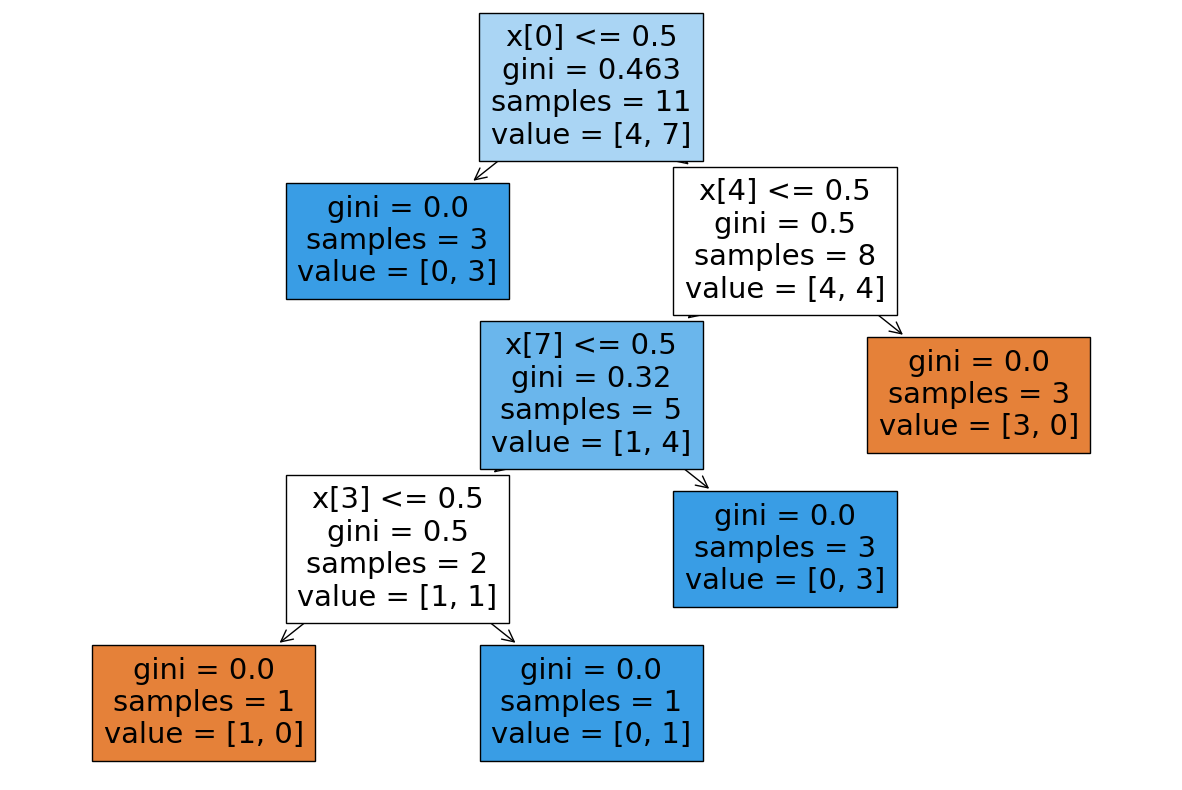

In [39]:
'''A3. Visualize the constructed tree with plot_tree() command.
Following code snippet for help.
'''

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Make sure you have already split and prepared your data

plt.figure(figsize=(15, 10))  # Adjust the figsize as needed
plot_tree(model, filled=True)
plt.show()



Training Set Accuracy: 1.0
Test Set Accuracy: 0.8846153846153846


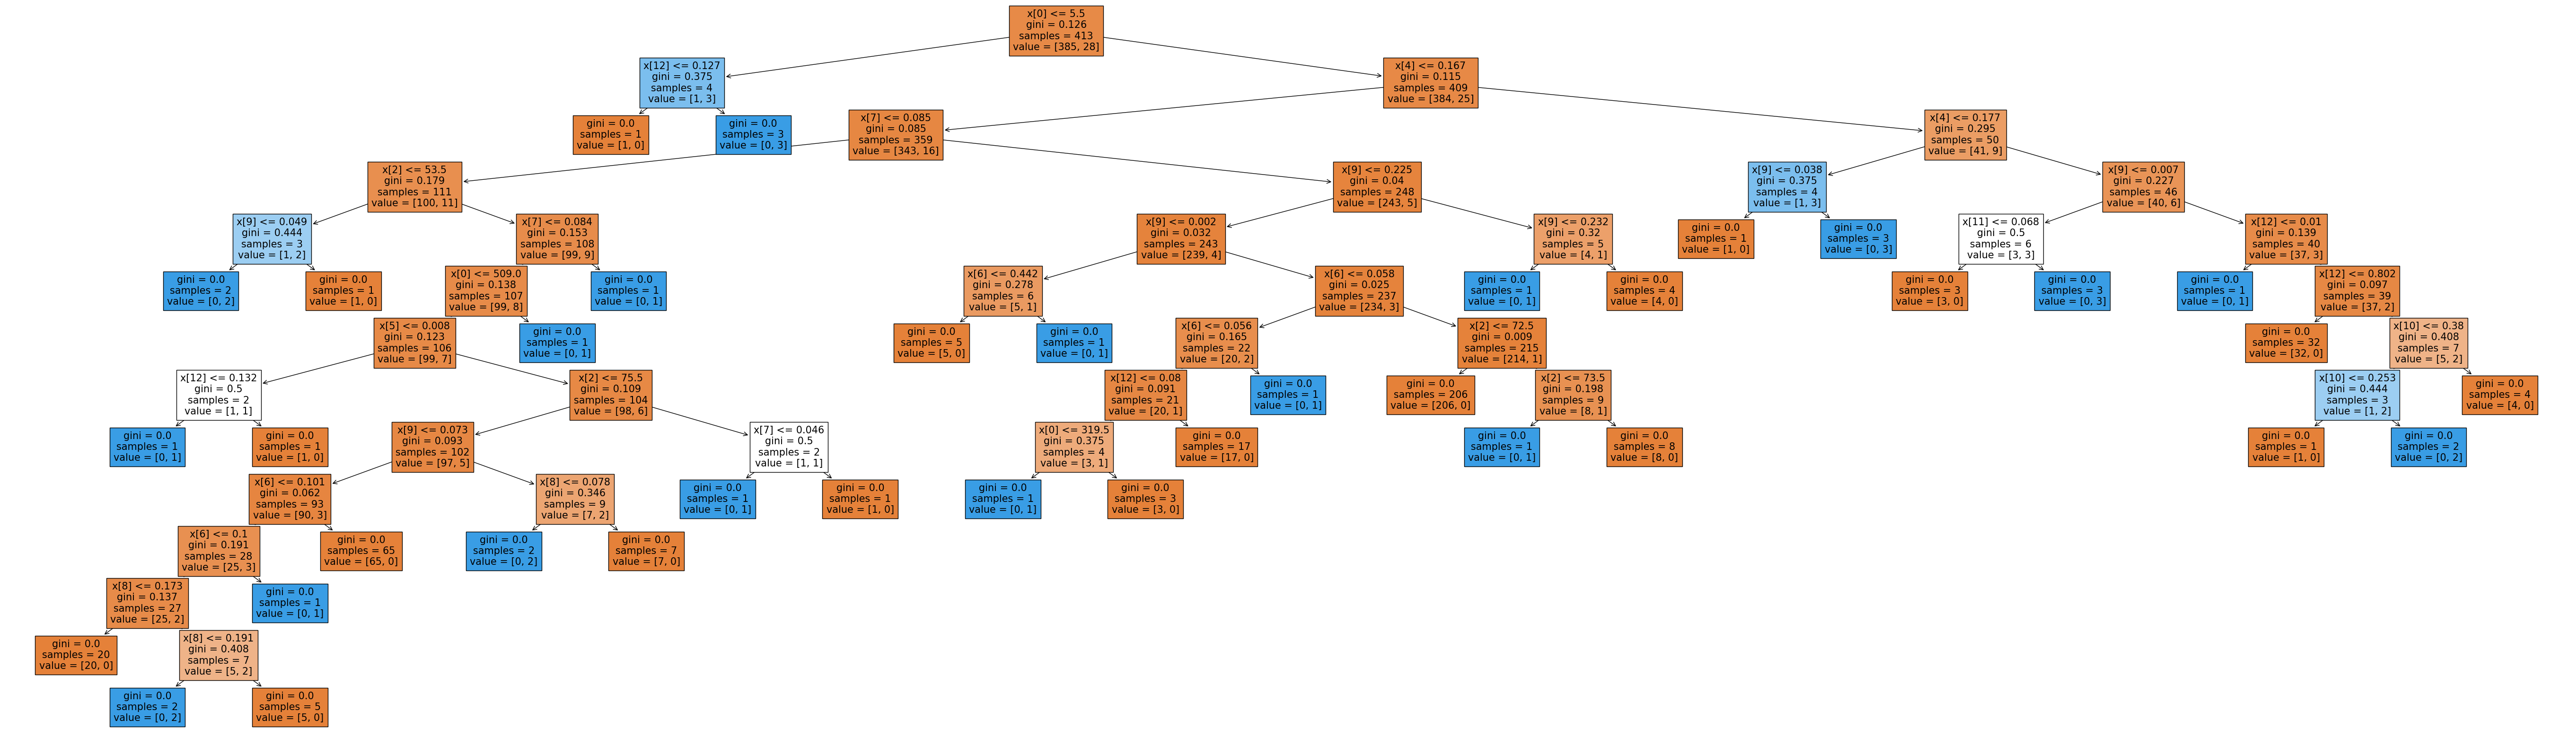

In [41]:
'''A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code
for help.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('face_mimic_df.csv')

# Separate features (X) and target (y)
X = data.drop('diagnosed', axis=1)
y = data['diagnosed']

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Split the data into features (X) and target (y) and further into training and testing sets
X = data.drop("diagnosed", axis=1)
y = data["diagnosed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate training set accuracy
train_accuracy = model.score(X_train, y_train)

# Calculate test set accuracy
test_accuracy = model.score(X_test, y_test)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()


Training Set Accuracy (max_depth=5): 0.96
Test Set Accuracy (max_depth=5): 0.89


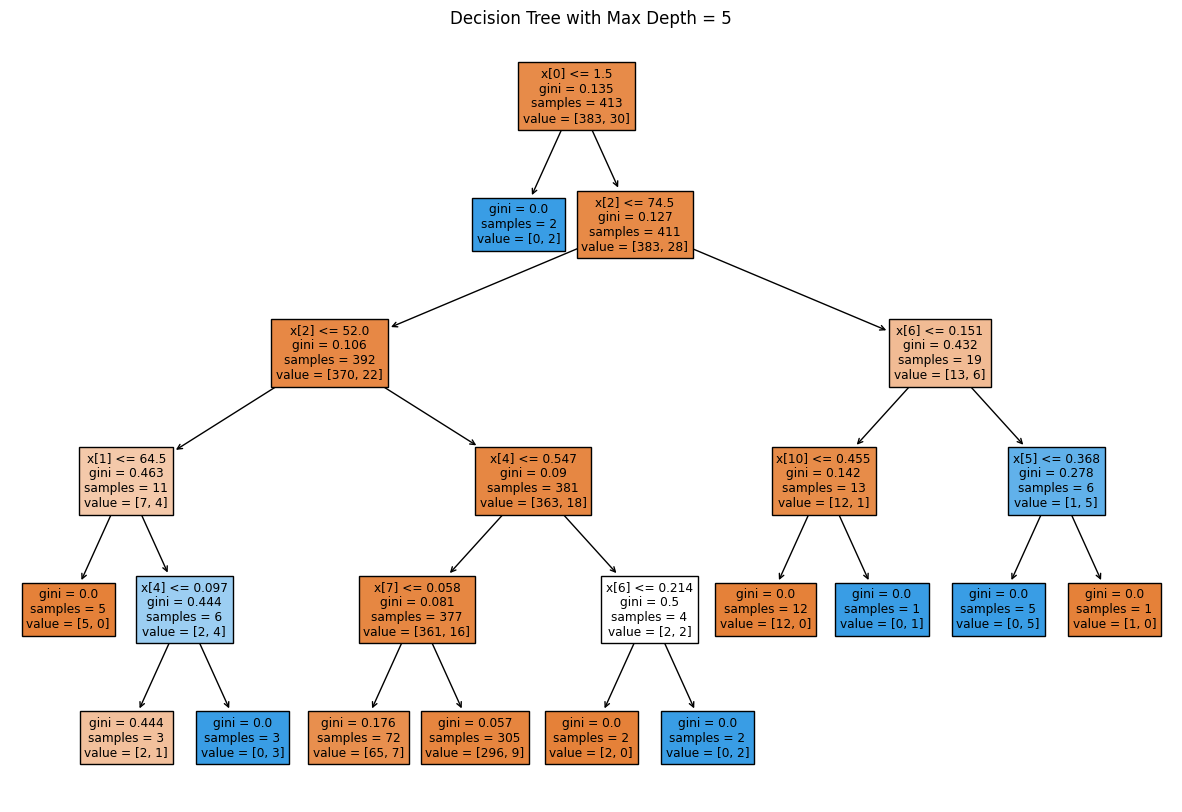

In [42]:
'''A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the
accuracies. Visualize the tree constructed with max_depth constraint'''

data = pd.read_csv('face_mimic_df.csv')

# Separate features (X) and target (y)
X = data.drop('diagnosed', axis=1)  # Replace 'diagnosed' with your target column name
y = data['diagnosed']

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Create a DecisionTreeClassifier with max_depth constraint
max_depth = 5
model = DecisionTreeClassifier(max_depth=max_depth)

# Split the data into features (X) and target (y) and further into training and testing sets
X = data.drop("diagnosed", axis=1)
y = data["diagnosed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title(f"Decision Tree with Max Depth = {max_depth}")
plt.show()


Decision Tree with Criterion: Entropy
Training Set Accuracy: 1.00
Test Set Accuracy: 0.89


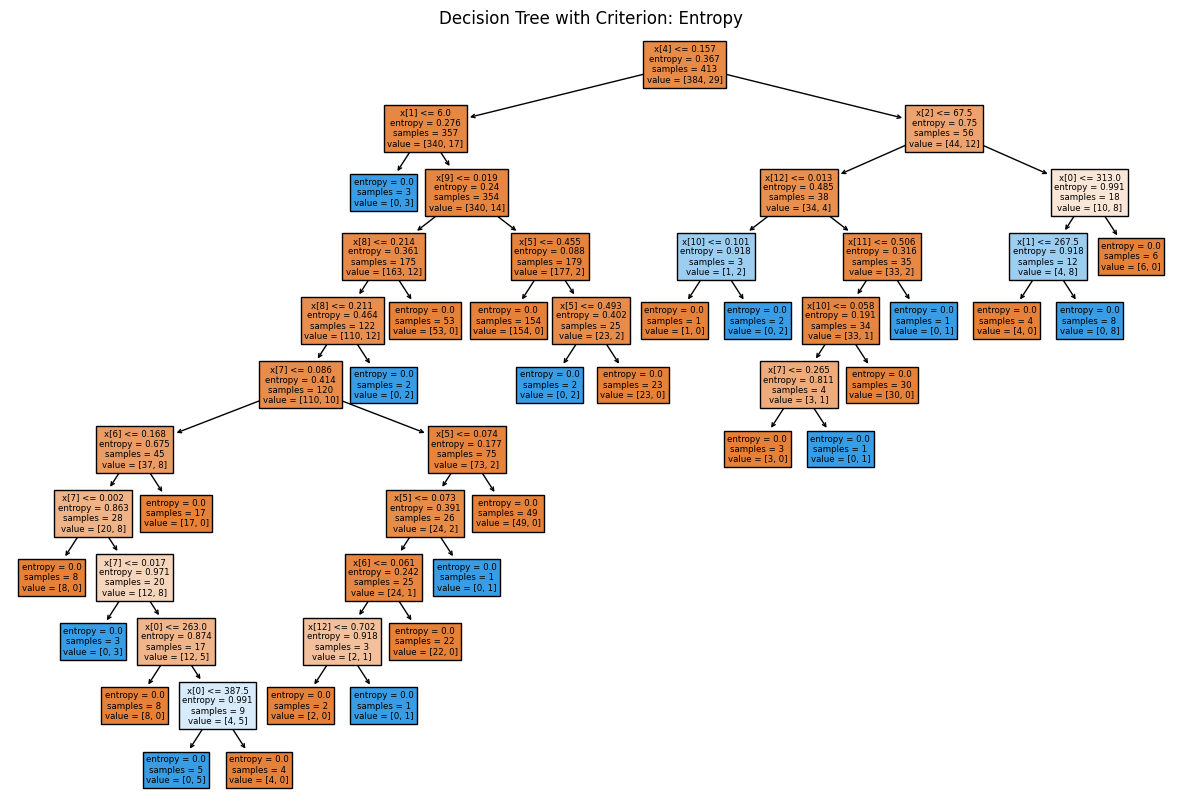

In [43]:
'''A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study
the model & graph. Find the differences between the default criterion and entropy criterion. Refer
code below for criterion'''

data = pd.read_csv('face_mimic_df.csv')

# Separate features (X) and target (y)
X = data.drop('diagnosed', axis=1)  # Replace 'diagnosed' with your target column name
y = data['diagnosed']

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Create a DecisionTreeClassifier with criterion="entropy"
model = DecisionTreeClassifier(criterion="entropy")

# Split the data into features (X) and target (y) and further into training and testing sets
X = data.drop("diagnosed", axis=1)
y = data["diagnosed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Decision Tree with Criterion: Entropy")
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Plot the Decision Tree with "Entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title("Decision Tree with Criterion: Entropy")
plt.show()


In [44]:
'''A7. Construct a random forest classifier on your project data. Find the differences between the
decision tree & random forest classifiers with the help of the performance metrics. '''

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your project data into a DataFrame
data = pd.read_csv('face_mimic_df.csv')

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Separate features (X) and target (y)
X = data.drop('diagnosed', axis=1)  # Replace 'diagnosed' with your target column name
y = data['diagnosed']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on test data using Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Predict on test data using Random Forest
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)

# Print performance metrics for both models
print("Decision Tree Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")



Decision Tree Metrics:
Accuracy: 0.82
Precision: 0.08
Recall: 0.11
F1-score: 0.10

Random Forest Metrics:
Accuracy: 0.91
Precision: 0.50
Recall: 0.11
F1-score: 0.18
